<a href="https://colab.research.google.com/github/xyz54514/Pokemon_Pokedex/blob/main/%E5%AF%B6%E5%8F%AF%E5%A4%A2%E5%9C%96%E9%91%91.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#dataset connection
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#read all photos and turn them into lists
import cv2
import tensorflow as tf
from tensorflow.keras.utils import img_to_array
import os
origin_path = "/content/drive/MyDrive/cnnoutput5"
data=[]
labels=[]
def openfile(file_path):
  parents = os.listdir(file_path)
  for parent in parents:
    child = os.path.join(file_path,parent)
    if os.path.isdir(child):
      openfile(child)
    else:
      img = cv2.imread(child)
      img = cv2.resize(img, (112, 112))
      img = img_to_array(img)
      img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      img = img.reshape(1, 112, 112, 3) * 1.0/255
      data.append(img)

      label = child.split(os.path.sep)[-2]
      labels.append(label)
openfile(origin_path)
data[0].shape

In [ ]:
#shuffle training data and testing data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import np_utils
data = np.array(data, dtype="float")
data = data.squeeze()
labels_array = np.array(labels)
labels_array = LabelBinarizer().fit_transform(labels_array)

(trainX, testX, trainY, testY) = train_test_split(data, labels_array,
                                                  #random_state=42,
                                                  train_size=0.8)

print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(1692, 112, 112, 3)
(424, 112, 112, 3)
(1692, 12)
(424, 12)


In [ ]:
#Our module
from keras.models import Sequential
from keras.layers import *
model = Sequential()
model.add(Conv2D(32, (3, 3), padding="same", input_shape=(112, 112, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(labels_array.shape[1]*10))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(labels_array.shape[1]))
model.add(Activation("softmax"))
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 112, 112, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 112, 112, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 56, 56, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 56, 56, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 56, 56, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 28, 28, 64)       0

In [ ]:
#training
history = model.fit(trainX, trainY, epochs=20,
         #validation_split=0.2,
          batch_size=32, validation_data = (testX, testY))

Epoch 1/20
53/53 [==============================] - 11s 40ms/step - loss: 1.7948 - accuracy: 0.4545 - val_loss: 2.4530 - val_accuracy: 0.1108
Epoch 2/20
53/53 [==============================] - 1s 24ms/step - loss: 0.8617 - accuracy: 0.7104 - val_loss: 2.9062 - val_accuracy: 0.0991
Epoch 3/20
53/53 [==============================] - 1s 24ms/step - loss: 0.5750 - accuracy: 0.8156 - val_loss: 2.2199 - val_accuracy: 0.3019
Epoch 4/20
53/53 [==============================] - 1s 24ms/step - loss: 0.4511 - accuracy: 0.8617 - val_loss: 2.4670 - val_accuracy: 0.2618
Epoch 5/20
53/53 [==============================] - 1s 25ms/step - loss: 0.3463 - accuracy: 0.8913 - val_loss: 2.0689 - val_accuracy: 0.3608
Epoch 6/20
53/53 [==============================] - 1s 24ms/step - loss: 0.2743 - accuracy: 0.9108 - val_loss: 1.7777 - val_accuracy: 0.4316
Epoch 7/20
53/53 [==============================] - 1s 24ms/step - loss: 0.2432 - accuracy: 0.9297 - val_loss: 1.4755 - val_accuracy: 0.5283
Epoch 8/20
5

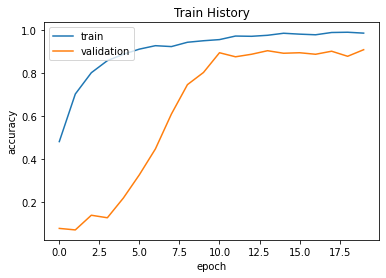

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Train History')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','validation'], loc='upper left')
plt.show()

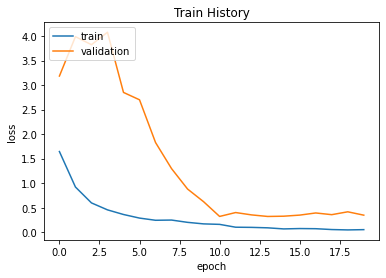

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Train History')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','validation'], loc='upper left')
plt.show()

14/14 [==============================] - 0s 14ms/step
[[23  0  0  0  0  0  0  0  0  0  0  0]
 [ 1 36  0  0  1  0  0  0  1  0  0  0]
 [ 0  0 33  2  0  0  1  0  0  0  0  0]
 [ 0  0  5 33  1  0  1  0  2  0  0  0]
 [ 0  0  0  0 29  0  0  0  0  0  0  0]
 [ 0  0  1  0  1 31  0  1  0  0  0  1]
 [ 0  0  0  0  0  0 54  0  0  0  0  0]
 [ 0  1  0  0  1  0  0 22  2  0  0  1]
 [ 1  0  0  0  0  0  0  0 31  0  0  0]
 [ 0  2  0  0  2  1  1  5  1 19  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 33  0]
 [ 0  0  0  1  0  0  0  0  0  0  1 41]]


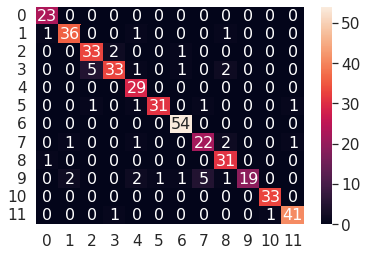

In [ ]:
import pandas as pd
import seaborn as sn
from sklearn.metrics import confusion_matrix
predict = model.predict(testX).argmax(axis=1)
class_test = testY.argmax(axis=1)
cm1 = confusion_matrix(class_test, predict)
print(cm1)
def confusion_matrix_show(cm):
  df_cm = pd.DataFrame(cm, range(cm.shape[0]), range(cm.shape[1]))
  sn.set(font_scale=1.4)
  sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
  plt.show()
confusion_matrix_show(cm1)

In [ ]:
existdict = {}
for i in range(0, len(labels)):
  if(labels[i] not in existdict):
    print(labels[i])
    print(labels_array[i])
    existdict.update({labels[i]: labels_array[i]})
print(existdict)

Koffing
[0 0 0 0 0 1 0 0 0 0 0 0]
Venomoth
[0 0 0 0 0 0 0 0 0 1 0 0]
Squirtle
[0 0 0 0 0 0 0 0 1 0 0 0]
Vileplume
[0 0 0 0 0 0 0 0 0 0 1 0]
Voltorb
[0 0 0 0 0 0 0 0 0 0 0 1]
Seel
[0 0 0 0 0 0 0 1 0 0 0 0]
Geodude
[0 0 0 0 1 0 0 0 0 0 0 0]
Pikachu
[0 0 0 0 0 0 1 0 0 0 0 0]
Chansey
[0 1 0 0 0 0 0 0 0 0 0 0]
Charmander
[0 0 1 0 0 0 0 0 0 0 0 0]
Eevee
[0 0 0 1 0 0 0 0 0 0 0 0]
Bulbasaur
[1 0 0 0 0 0 0 0 0 0 0 0]
{'Koffing': array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]), 'Venomoth': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]), 'Squirtle': array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]), 'Vileplume': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]), 'Voltorb': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]), 'Seel': array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]), 'Geodude': array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]), 'Pikachu': array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]), 'Chansey': array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 'Charmander': array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 'Eevee': array([0, 0, 0

In [ ]:
import matplotlib.pyplot as plt
def get_key(val):
  for key, value in existdict.items():
    if (np.array_equal(val, value)):
      return key
  return "key doesn't exist"
predict = model.predict(testX)
for i in range(0,5):
  print(predict[i])
  print(testY[i])
  print(get_key(testY[i]))

14/14 [==============================] - 0s 8ms/step
[1.0768161e-05 3.7407426e-03 5.4852767e-06 1.5607534e-06 4.7153735e-04
 9.8929673e-01 2.5214302e-05 1.7068269e-05 4.1697440e-06 1.0792223e-03
 1.2726040e-04 5.2201976e-03]
[0 0 0 0 0 1 0 0 0 0 0 0]
Koffing
[7.7983923e-06 5.4996262e-06 5.7047023e-06 9.9878567e-01 4.6268394e-04
 8.1952510e-07 6.9535594e-04 1.1575479e-06 9.5062733e-06 4.0377781e-06
 2.1582337e-05 1.4239825e-07]
[0 0 0 1 0 0 0 0 0 0 0 0]
Eevee
[9.2854537e-11 2.4905769e-10 1.5169785e-09 1.0000000e+00 3.5186934e-10
 1.1063341e-10 1.5596680e-08 1.9726151e-10 7.1280257e-09 9.3906127e-10
 3.6606580e-09 3.0728881e-11]
[0 0 0 1 0 0 0 0 0 0 0 0]
Eevee
[2.1531107e-04 1.3626026e-01 1.8633663e-03 4.7237455e-04 2.9895080e-02
 1.4279843e-03 6.7939633e-01 1.9657474e-03 1.5578351e-03 1.4175579e-01
 4.9750297e-03 2.1484280e-04]
[0 0 0 0 0 0 0 0 0 1 0 0]
Venomoth
[9.8977053e-01 3.4430883e-05 2.0055411e-05 5.0419687e-05 7.2456943e-03
 1.0893691e-05 1.6441571e-06 3.2223485e-05 2.7941254e-0

In [ ]:
def pokedex(pokemon):
  if(pokemon == "Charmander"):
    print("Charmamder, It has a preference for hot things. When it rains, steam is said to spout from the tip of its tail.")
    print("https://tw.portal-pokemon.com/play/pokedex/004")
  elif(pokemon == "Bulbasaur"):
    print("Bulbasaur, There is a plant seed on its back right from the day this Pokémon is born. The seed slowly grows larger.")
    print("https://tw.portal-pokemon.com/play/pokedex/001")
  elif(pokemon == "Squirtle"):
    print("Squirtle, When it retracts its long neck into its shell, it squirts out water with vigorous force.")
    print("https://tw.portal-pokemon.com/play/pokedex/007")
  elif(pokemon == "Pikachu"):
    print("Pikachu, Pikachu that can generate powerful electricity have cheek sacs that are extra soft and super stretchy.")
    print("https://tw.portal-pokemon.com/play/pokedex/025")
  elif(pokemon == "Koffing"):
    print("Koffing, Its body is full of poisonous gas. It floats into garbage dumps, seeking out the fumes of raw, rotting trash.")
    print("https://tw.portal-pokemon.com/play/pokedex/109")
  elif(pokemon == "Venomoth"):
    print("Venomoth, The powdery scales on its wings are hard to remove from skin. They also contain poison that leaks out on contact.")
    print("https://tw.portal-pokemon.com/play/pokedex/049")
  elif(pokemon == "Vileplume"):
    print("Vileplume, It has the world’s largest petals. With every step, the petals shake out heavy clouds of toxic pollen.")
    print("https://tw.portal-pokemon.com/play/pokedex/045")
  elif(pokemon == "Voltorb"):
    print("Voltorb, It is said to camouflage itself as a Poké Ball. It will self-destruct with very little stimulus.")
    print("https://tw.portal-pokemon.com/play/pokedex/100")
  elif(pokemon == "Geodude"):
    print("Geodude, Commonly found near mountain trails and the like. If you step on one by accident, it gets angry.")
    print("https://tw.portal-pokemon.com/play/pokedex/074")
  elif(pokemon == "Seel"):
    print("Seel, Loves freezing-cold conditions. Relishes swimming in a frigid climate of around 14 degrees Fahrenheit.")
    print("https://tw.portal-pokemon.com/play/pokedex/086")
  elif(pokemon == "Eevee"):
    print("Eevee, It has the ability to alter the composition of its body to suit its surrounding environment.")
    print("https://tw.portal-pokemon.com/play/pokedex/133")
  elif(pokemon == "Chansey"):
    print("Chansey, The egg Chansey carries is not only delicious but also packed with nutrition. It’s used as a high-class cooking ingredient.")
    print("https://tw.portal-pokemon.com/play/pokedex/113")

Saving pika.png to pika (2).png
Saving kof.jpg to kof (2).jpg
Saving ven.jpg to ven (2).jpg
Saving vil.jpg to vil (2).jpg
Saving vol.png to vol (2).png
Saving squ.png to squ (2).png
Saving char.png to char (2).png
1/1 [==============================] - 0s 25ms/step


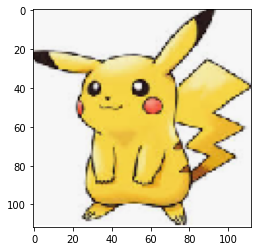

pika.png :  Pikachu 0.9999207   Eevee 6.9767906e-05
Pikachu, Pikachu that can generate powerful electricity have cheek sacs that are extra soft and super stretchy.
https://tw.portal-pokemon.com/play/pokedex/025
1/1 [==============================] - 0s 27ms/step


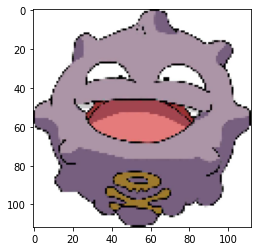

kof.jpg :  Koffing 0.9972065   Vileplume 0.0021027736
Koffing, Its body is full of poisonous gas. It floats into garbage dumps, seeking out the fumes of raw, rotting trash.
https://tw.portal-pokemon.com/play/pokedex/109
1/1 [==============================] - 0s 22ms/step


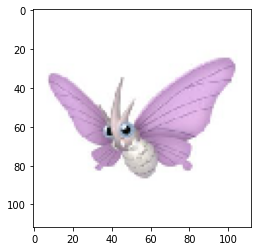

ven.jpg :  Venomoth 0.9624781   Chansey 0.03085932
Venomoth, The powdery scales on its wings are hard to remove from skin. They also contain poison that leaks out on contact.
https://tw.portal-pokemon.com/play/pokedex/049
1/1 [==============================] - 0s 23ms/step


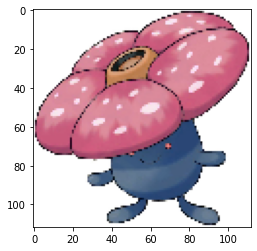

vil.jpg :  Vileplume 0.9998765   Koffing 5.575387e-05
Vileplume, It has the world’s largest petals. With every step, the petals shake out heavy clouds of toxic pollen.
https://tw.portal-pokemon.com/play/pokedex/045
1/1 [==============================] - 0s 22ms/step


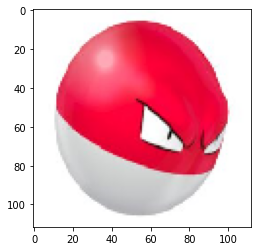

vol.png :  Voltorb 0.9999764   Koffing 1.4184573e-05
Voltorb, It is said to camouflage itself as a Poké Ball. It will self-destruct with very little stimulus.
https://tw.portal-pokemon.com/play/pokedex/100
1/1 [==============================] - 0s 24ms/step


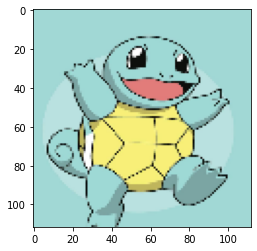

squ.png :  Squirtle 0.9998938   Eevee 2.4203084e-05
Squirtle, When it retracts its long neck into its shell, it squirts out water with vigorous force.
https://tw.portal-pokemon.com/play/pokedex/007
1/1 [==============================] - 0s 26ms/step


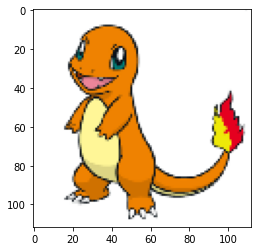

char.png :  Charmander 0.998086   Pikachu 0.000814525
Charmamder, It has a preference for hot things. When it rains, steam is said to spout from the tip of its tail.
https://tw.portal-pokemon.com/play/pokedex/004


In [ ]:
#predict our own data
from google.colab import files
from keras.utils import image_utils
upload = files.upload()
for fn in upload.keys():
  path = fn
  img = image_utils.load_img(path, target_size=(112, 112))

  frame = cv2.imread(fn)
  frame = cv2.resize(frame, (112, 112), interpolation=cv2.INTER_AREA)
  frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
  #frame = np.moveaxis(frame, -1, 0)
  frame = frame.reshape(1, 112, 112, 3) * 1.0/255
  classes = model.predict(frame, batch_size=10)
  max=0
  secondmax=0
  maxlabel=0
  secondmaxlabel=0
  for j in range(0, classes[0].size):
    if(classes[0][j] > max):
      max = classes[0][j]
      maxlabel = j
  for j in range(0, classes[0].size):
    if(classes[0][j] > secondmax and classes[0][j] != max):
      secondmax = classes[0][j]
      secondmaxlabel = j
  listvalue = []
  listvalue2 = []
  for k in range(0, classes[0].size):
    if(k != maxlabel):
      listvalue.append(0)
    else:
      listvalue.append(1)
    if(k != secondmaxlabel):
      listvalue2.append(0)
    else:
      listvalue2.append(1)
  listvalue = np.array(listvalue)
  listvalue2 = np.array(listvalue2)
  plt.imshow(img)
  plt.show()
  print(fn, ": ", get_key(listvalue), max, " ", get_key(listvalue2), secondmax)
  pokedex(get_key(listvalue))